In [1]:
from imports import *
import staircase as sc
%matplotlib inline


In [2]:
df = pd.read_csv(r"../data/page_views.csv")

vsteps = Steps.read_dataframe(df,'start','ends')

df.shape

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(947, 3)

86.15896512739357
86.15896512739357


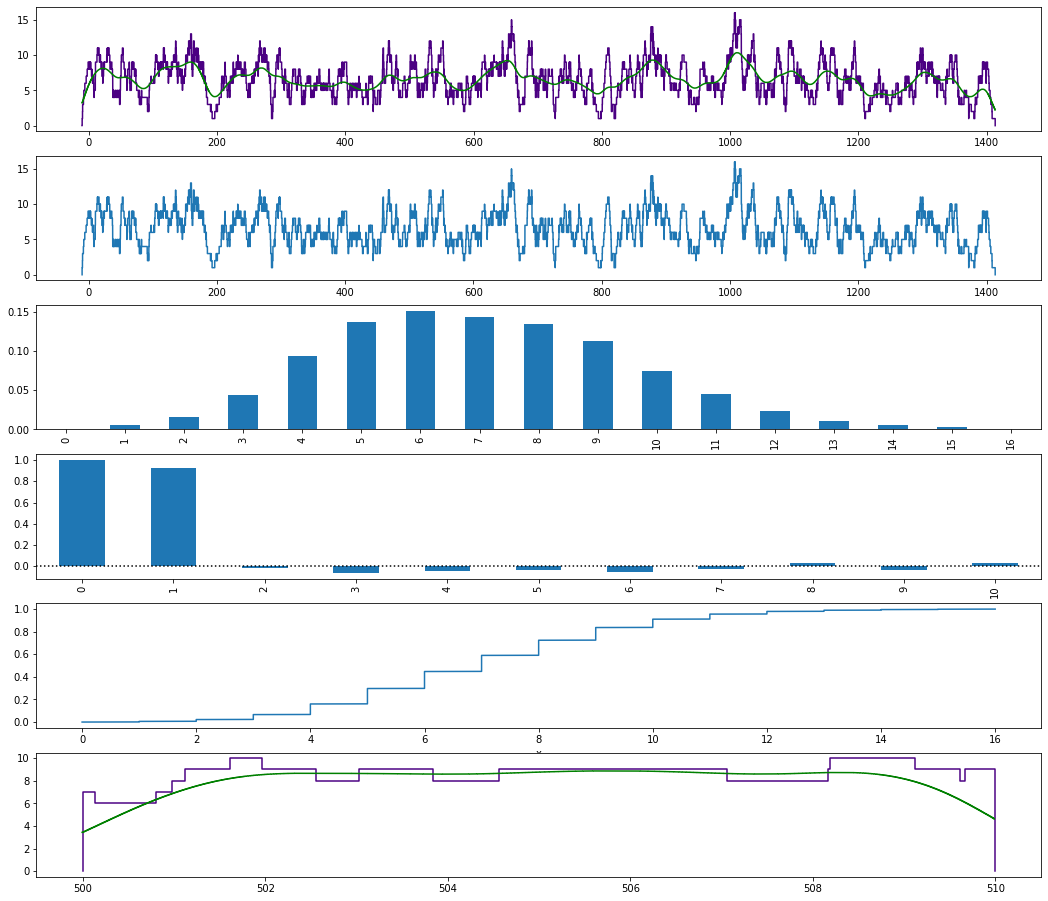

In [3]:
#p = np.arange(pd.Timestamp(2020,1,1), pd.Timestamp(2020,12,30), pd.Timedelta(hours=1)).astype(pd.Timestamp)
fig,ax = plt.subplots(nrows=6,figsize=(18,16))

#vsteps.rebase(tbase)
vs_clip = vsteps.clip(500,510)

vsteps.plot(ax=ax[0])
vsteps.smooth_plot(ax=ax[0],color='g',ts_grain=0.1,smooth_factor=15)

queue = sc.Stairs().layer(df.start, df.ends)
queue.plot(ax[1])

vsteps.histogram_plot(ax=ax[2],kind='bar')
xx = vsteps.pacf_plot(10,ax=ax[3],kind='bar')
xx.axhline(0,c='black',linestyle=':')
vsteps.ecdf_plot(ax=ax[4])
vs_clip.plot(ax=ax[5])
vs_clip.smooth_plot(ax=ax[5],color='g',ts_grain=0.01,smooth_factor=1)

print(queue.clip(500,510).integrate())

print(vsteps.clip(500,510).integrate())